Jupyter worksheet to make sure the code works correctly



In [13]:
load("quivers.sage")
dir(Quiver)

['__add__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_keyVertices',
 '_pointOfReturnFork',
 '_preForkVertices',
 '_tipVertices',
 '_wingVertices',
 'abundantTriangularExtension',
 'arrow',
 'cMatrix',
 'digraph',
 'disjointUnion',
 'forklessPart',
 'framedQuiver',
 'frozenVertices',
 'fullSubquiver',
 'greens',
 'hasFiniteForklessPart',
 'hasFrozen',
 'hasSinks',
 'hasSources',
 'hasZeroForklessPart',
 'isAbundant',
 'isAbundantAcyclic',
 'isAcyclic',
 'isComplete',
 'isFork',
 'isIsomorphicTo',
 'isKey',
 'isLabeledCycle',
 'isPreFork',
 'isReddeningSequence',
 'isTip',
 'isWing',
 'isomorphicQuiver',
 'mutableVertices',
 'mutate',
 'neighborhood',
 'oppositeQ

In [14]:
# Code block that loads the file and initializes all the variables we'll need
# Testing only on rank 4 for now, as that will allow us to look at all the types of quivers we need
n = 4
abundantM = matrix(([0,2,3,4],[-2,0,5,6],[-3,-5,0,7],[-4,-6,-7,0])) # rank 4 abundant acyclic
cyclicM = matrix(([0,3,-3,3],[-3,0,3,3],[3,-3,0,3],[-3,-3,-3,0])) # rank 4 mutation-cyclic
rank3test = [2,1,3,2,1,3,2,1,2,1,3,4,2,4] # Example mutation
rank3back = [2,2,3,3,1,1,2,3] # Is not empty mutation
rank3empty = []
rank3equiv = [2,2,3,3,1,1,3,3,2,2] # Equivalent to empty matrix

matrices = [abundantM, cyclicM] # list of matrices to try
C = identity_matrix(n)
matrices = matrices
framedMatricesCols = [block_matrix([[B,C]]) for B in matrices]
framedMatricesRows = [block_matrix([[B],[C]]) for B in matrices]
mutations = [rank3test,rank3back,rank3empty,rank3equiv] # list of mutation sequences to try
rowOptions = ["cols", "rows"] # Options for n x 2n or 2n x n of class
orientOptions = ["positive", "negative"] # Options for orientation

Q = Quiver() # Initializes the quiver on 1 vertex
print(Q)

mutationWorks = True # Variable to test if mutation works
verticesWorks = True # Variable to test if code involving vertices works

[0]


In [15]:
# TESTS MUTATION

for M in matrices:
    for row in rowOptions:
        for orient in orientOptions:
            Q = Quiver(M,rowsOrCols = row, orientation = orient)
            
            if Q.matrix != M:
                print("Matrix was not constructed for:\n", M, row, orient)
                print(Q)
                continue
            
            for w in mutations:
                N = mMutation(M,w)
                P = Q.mutate(w)
                R = Quiver(N, rowsOrCols = row, orientation = orient)
                if R != P:
                    print("---------------------")
                    print("Mutation fails for: ")
                    print("Matrix: ", M)
                    print("Mutation: ", w)
                    print("rowsOrCols: ", row)
                    print("orientation: ", orient)
                    mutationWorks = False
                
for M in framedMatricesRows:
    for orient in orientOptions:
        Q = Quiver(M,rowsOrCols = "rows", orientation = orient)
        
        if Q.matrix != M:
            print("Matrix was not constructed for:\n", M, row, orient)
            print(Q)
            continue

        for w in mutations:
            N = mMutation(M,w)
            P = Q.mutate(w)
            if N != P.matrix:
                print("---------------------")
                print("Mutation fails for: ")
                print("Matrix: ", M)
                print("Mutation: ", w)
                print("rowsOrCols: ", row)
                print("orientation: ", orient)
                mutationWorks = False
        
for M in framedMatricesCols:
    for orient in orientOptions:
        Q = Quiver(M,rowsOrCols = "cols", orientation = orient)
        
        if Q.matrix != M:
            print("Matrix was not constructed for:\n", M, row, orient)
            print(Q)
            continue

        for w in mutations:
            N = mMutation(M,w)
            P = Q.mutate(w)
            if N != P.matrix:
                print("---------------------")
                print("Mutation fails for: ")
                print("Matrix: ", M)
                print("Mutation: ", w)
                print("rowsOrCols: ", row)
                print("orientation: ", orient)
                mutationWorks = False
                
if mutationWorks:
    print("Mutation works as expected")
else:
    print("Something Broke")
                

Mutation works as expected


In [16]:
# TESTS SINK/SOURCE/STOPOVER FUNCTIONS

for M in matrices:
    for row in rowOptions:
        for orient in orientOptions:
            Q = Quiver(M,rowsOrCols = row, orientation = orient)
            
            if Q.matrix != M:
                print("Matrix was not constructed for:\n", M, row, orient)
                print(Q)
                continue
            
            for w in mutations:
                if orient == "negative":
                    N = mMutation(-M,w)
                else:
                    N = mMutation(M,w)
                P = Q.mutate(w)
                sinks = tuple(sinkVertices(N))
                sources = tuple(sourceVertices(N))
                stover = [tuple(stopover(i,N,j)) for i in [1..n] for j in [1..n] if i != j]
                stoverP = [P.stopover(i,j) for i in [1..n] for j in [1..n] if i != j]
                if sinks != P.sinks or sources != P.sources or stover != stoverP:
                    print("---------------------")
                    print("Fails for: ")
                    print("Matrix: \n", M)
                    print("Mutation: ", w)
                    print("Mutated Matrix: \n", N)
                    print("rowsOrCols: ", row)
                    print("orientation: ", orient)
                    print(sinks, P.sinks)
                    print(sources,P.sources)
                    print(stover, stoverP)
                    verticesWorks = False
                    
for M in framedMatricesRows:
    for orient in orientOptions:
        Q = Quiver(M,rowsOrCols = "rows", orientation = orient)
        if orient == "negative":
            N = mMutation(-M,w)
        else:
            N = mMutation(M,w)
        P = Q.mutate(w)
        stover = [tuple(stopover(i,N,j)) for i in [1..n] for j in [1..n] if i != j]
        stoverP = [P.stopover(i,j) for i in [1..n] for j in [1..n] if i != j]
        if stover != stoverP:
            print("---------------------")
            print("Fails for: ")
            print("Matrix: \n", M)
            print("Mutation: ", w)
            print("Mutated Matrix: \n", N)
            print("rowsOrCols: ", row)
            print("orientation: ", orient)
            verticesWorks = False
        
for M in framedMatricesCols:
    for orient in orientOptions:
        Q = Quiver(M,rowsOrCols = "cols", orientation = orient)
        if orient == "negative":
            N = mMutation(-M,w)
        else:
            N = mMutation(M,w)
        P = Q.mutate(w)
        stover = [tuple(stopover(i,N,j)) for i in [1..n] for j in [1..n] if i != j]
        stoverP = [P.stopover(i,j) for i in [1..n] for j in [1..n] if i != j]
        if stover != stoverP:
            print("---------------------")
            print("Fails for: ")
            print("Matrix: \n", M)
            print("Mutation: ", w)
            print("Mutated Matrix: \n", N)
            print("rowsOrCols: ", row)
            print("orientation: ", orient)
            verticesWorks = False
                
if verticesWorks:
    print("Functions work as intended")
else:
    print("Something Broke")

Functions work as intended


In [17]:
for M in matrices:
    for row in rowOptions:
        for orient in orientOptions:
            Q = Quiver(M,rowsOrCols = row, orientation = orient)
            
            

In [18]:
[1..3]

[1, 2, 3]

In [19]:
Q.hasSinks

False

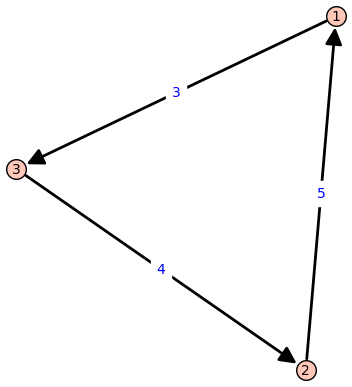

[                                 -3819445223276342591352                                   -115866322520643395972                                  -1274529530377162309117]
[                      -141216696566093924424234654251400                        -28241653603750067241508906101019                       -308090793951777823115865638498040]
[ 4984052780900683229941612992265713086634548816955476743   996751061338735788434543337000689399595212281742936280 10873648907702465108531930455924827895567274054182258221]
[                                                                             0                        2533917132621017378605539375703363723641970129629855772 -89431186527584639654539206243117060579702165346034759072295462610711834675555|                                                       -3819445223276342591352                                                         -115866322520643395972                                                        -1274529530377162309117]
[    

In [1]:
load("quivers.sage")

M = matrix(([0, -5, 3],[5, 0, -4],[-3,4,0]))
N = block_matrix([[M,identity_matrix(3)]])
Q = Quiver(M)
Q.show()
mutSeq = [1,2,2,3,2,1,2,3,2,1,2,3,2]
print(Q.cMatrix(mutSeq))
print(mMutation(N,mutSeq))

In [3]:
load("quivers.sage")

## think the 1 forkless part due to iso morphism are special cases of something
## idk what I was trying to show here, ignore this
P = Quiver(matrix(([0, 3, -3],[-2, 0, 2],[2,-2,0])))
print('\n', P.reflections([2,3,2,1,2]))
print('\n', P.reflectionsCanceled([2,3,2,1,2]))
P.calculateLMatrix([2,3,2,1,2], [3,2,1])



 [Quiver([ 0 -3  9| 5 18 15]
[ 2  0 -4|-2 -7 -6]
[-6  4  0| 0 -2 -1]), '3,2,1,2,3,2,3,2,1,2,3,3,2,1,2,3,3,2,1,2,3,2,3,2,1,2,3', '3,2,1,2,3,2,3,2,1,2,3', '2,3,2']

 [Quiver([ 0 -3  9| 5 18 15]
[ 2  0 -4|-2 -7 -6]
[-6  4  0| 0 -2 -1]), '3,2,1,2,3,2,3,2,1,2,3,2,3,2,1,2,3', '3,2,1,2,3,2,3,2,1,2,3', '2,3,2']


[
Quiver([ 0 -3  9| 5 18 15]  [ -5 -18 -15]
[ 2  0 -4|-2 -7 -6]         [  2   7   6]
[-6  4  0| 0 -2 -1])      , [  0   2   1]
]

In [17]:
load("quivers.sage")

## think the 1 forkless part due to iso morphism are special cases of something
## idk what I was trying to show here, ignore this
P = Quiver(matrix(([0, 3, -4,-2],[-3, 0 , 5,5],[4,-5,0,2],[2,-5,-2,0])))
P.getLinearOrdering()

[ 1  1  1]
[ 0  5  5]
[-5  0  2]
[-5 -2  0]


[1, 4, 3, 2]

In [3]:
load("quivers.sage")
testQuiver = Quiver(matrix(([0, 5, -3],[-5, 0, 4],[3,-4,0])))
x = testQuiver.mutate([1])
print(x)
calculateClusterVariables(testQuiver, [1,2,1])


[  0  -5   3]
[  5   0 -11]
[ -3  11   0]


[x1*x3**52/(x2**5 + x3**3) + (x1**25*x3**55 + 5*x1**20*x2**25*x3**44 + 25*x1**20*x2**20*x3**47 + 50*x1**20*x2**15*x3**50 + 50*x1**20*x2**10*x3**53 + 25*x1**20*x2**5*x3**56 + 5*x1**20*x3**59 + 10*x1**15*x2**50*x3**33 + 100*x1**15*x2**45*x3**36 + 450*x1**15*x2**40*x3**39 + 1200*x1**15*x2**35*x3**42 + 2100*x1**15*x2**30*x3**45 + 2520*x1**15*x2**25*x3**48 + 2100*x1**15*x2**20*x3**51 + 1200*x1**15*x2**15*x3**54 + 450*x1**15*x2**10*x3**57 + 100*x1**15*x2**5*x3**60 + 10*x1**15*x3**63 + 10*x1**10*x2**75*x3**22 + 150*x1**10*x2**70*x3**25 + 1050*x1**10*x2**65*x3**28 + 4550*x1**10*x2**60*x3**31 + 13650*x1**10*x2**55*x3**34 + 30030*x1**10*x2**50*x3**37 + 50050*x1**10*x2**45*x3**40 + 64350*x1**10*x2**40*x3**43 + 64350*x1**10*x2**35*x3**46 + 50050*x1**10*x2**30*x3**49 + 30030*x1**10*x2**25*x3**52 + 13650*x1**10*x2**20*x3**55 + 4550*x1**10*x2**15*x3**58 + 1050*x1**10*x2**10*x3**61 + 150*x1**10*x2**5*x3**64 + 10*x1**10*x3**67 + 5*x1**5*x2**100*x3**11 + 100*x1**5*x2**95*x3**14 + 950*x1**5*x2**90*x3**17

In [4]:
import sympy
test1 = sympy.symbols('x1')
test2 = sympy.symbols('x2')
test3 = sympy.symbols('x3')

test2 = test2**5
test3 = test3 ** 3

finalTest = (test2 + test3)/((test2+test3)/test1)
finalTest = sympy.simplify(finalTest)
print(finalTest)

x1


In [42]:
CV=[]
for i in range(1,4):
    CV.append(sympy.symbols('x'+str(i)))
print(CV)

[x1, x2, x3]
